In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
data_2015=pd.read_csv(r"2015-HappinessData.csv")
data_2015.head()
# pd.read_csv("2015-HappinessData.csv")


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data15Copy=data_2015.copy()

data15Copy.describe()

# help(data15Copy.drop)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data15Copy.drop('Country',axis=1,inplace=True)
data15Copy.drop('Happiness Rank',axis=1,inplace=True)
data15Copy.drop('Standard Error',axis=1,inplace=True)
# we need to do something about regions
Y=data15Copy['Happiness Score']
data15Copy.drop('Happiness Score',axis=1,inplace=True)
X=data15Copy.copy().values

In [6]:
print(data15Copy.head())
print()
print()
labelEncoderX = LabelEncoder()
X[:,0]=labelEncoderX.fit_transform(X[:,0])
# do inplace = true please

           Region  Economy (GDP per Capita)   Family  \
0  Western Europe                   1.39651  1.34951   
1  Western Europe                   1.30232  1.40223   
2  Western Europe                   1.32548  1.36058   
3  Western Europe                   1.45900  1.33095   
4   North America                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176  




In [7]:
oneHotEncoder=OneHotEncoder(categorical_features=[0])



In [8]:
print(X[:,0])
print()
print()

X=oneHotEncoder.fit_transform(X).toarray()

[9 9 9 9 5 9 9 9 0 0 4 3 9 3 5 3 9 9 9 4 9 4 3 6 3 9 3 4 9 3 1 3 3 6 4 9 9
 2 4 3 3 3 3 1 1 2 2 3 4 9 3 1 3 1 1 1 3 3 1 1 6 1 4 1 3 9 9 4 1 1 8 2 1 6
 6 4 1 8 7 1 7 4 1 2 8 1 1 9 1 6 8 4 1 8 1 1 8 3 6 2 8 9 4 1 3 1 4 4 7 4 1
 4 8 8 8 8 7 8 3 8 7 8 8 8 8 8 1 8 6 1 8 7 8 1 4 4 8 8 8 8 8 8 8 8 6 8 8 8
 8 8 8 8 7 8 8 4 8 8]




In [9]:
print(X)# X cant be a pandas dataframe now, we need to something extra now
Y=Y.values # having numbers

[[0.      0.      0.      ... 0.41978 0.29678 2.51738]
 [0.      0.      0.      ... 0.14145 0.4363  2.70201]
 [0.      0.      0.      ... 0.48357 0.34139 2.49204]
 ...
 [0.      0.      0.      ... 0.18906 0.47179 0.32858]
 [0.      0.      0.      ... 0.10062 0.19727 1.83302]
 [0.      0.      0.      ... 0.10731 0.16681 1.56726]]


In [10]:
# apply Machine Learning models now

xtrain,xtest,ytrain,ytest=train_test_split(X,Y)
print(type(ytrain))

<class 'numpy.ndarray'>


In [11]:
alg=LR()
alg.fit(X=xtrain,y=ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
ypred=alg.predict(xtest)

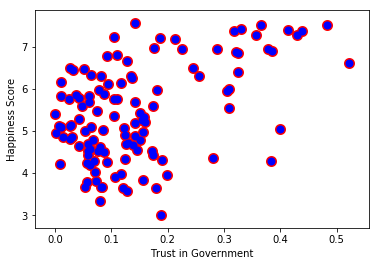

In these figures it can be easily seen that people who trust the government more are more likely to be happy.
A less corrupt government leads to happier population!


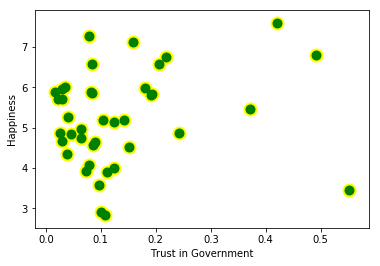

In [29]:
import matplotlib.pyplot as plt

# print(help(plt.scatter))
plt.scatter(xtrain[:,-3],ytrain,color="red",linewidths =5)
plt.scatter(xtrain[:,-3],alg.predict(xtrain),color="blue",linewidths =2)
plt.xlabel("Trust in Government")
plt.ylabel("Happiness Score")
plt.show()
print("In these figures it can be easily seen that people who trust the government more are more likely to be happy.")
print("A less corrupt government leads to happier population!")
plt.scatter(xtest[:,-3],ytest,color="yellow",linewidths =8)
plt.scatter(xtest[:,-3],ypred,color="green",linewidths =4)
plt.xlabel("Trust in Government(Predicted Domain)")
plt.ylabel("Happiness(Predicted Domain)")
plt.show()

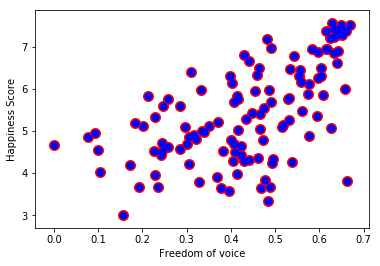

A country that gives its people more freedom is likely to be more happier
Providing more freedom peaks happy population even though other important factors are there!


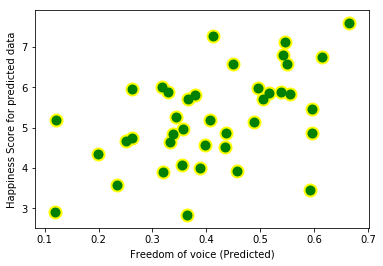

In [32]:
# print(help(plt.scatter))
plt.scatter(xtrain[:,-4],ytrain,color="red",linewidths =5)
plt.scatter(xtrain[:,-4],alg.predict(xtrain),color="blue",linewidths =2)
plt.xlabel("Freedom of voice")
plt.ylabel("Happiness Score")
plt.show()
print("A country that gives its people more freedom is likely to be more happier")
print("Providing more freedom peaks happy population even though other important factors are there!")
plt.scatter(xtest[:,-4],ytest,color="yellow",linewidths =8)
plt.scatter(xtest[:,-4],ypred,color="green",linewidths =4)
plt.xlabel("Freedom of voice (Predicted)")
plt.ylabel("Happiness Score for predicted data")
plt.show()

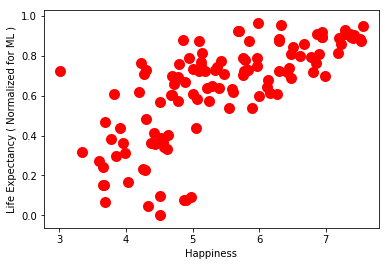

As happiness of the countries rises, so does the life expectancy!


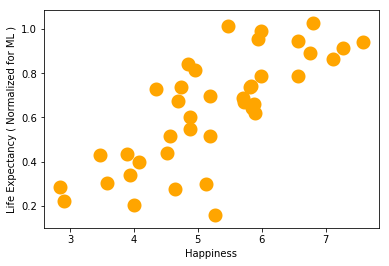

In [35]:
# print(help(plt.scatter))
plt.scatter(ytrain,xtrain[:,-5],color="red",linewidths =5)
# plt.scatter(xtrain[:,-4],alg.predict(xtrain),color="blue",linewidths =2)
plt.xlabel("Happiness")
plt.ylabel("Life Expectancy ( Normalized for ML )")
plt.show()
print("As happiness of the countries rises, so does the life expectancy!")
plt.scatter(ytest,xtest[:,-5],color="orange",linewidths =8)
# plt.scatter(xtest[:,-4],ypred,color="green",linewidths =4)
plt.xlabel("Happiness")
plt.ylabel("Life Expectancy ( Normalized for ML )")
plt.show()

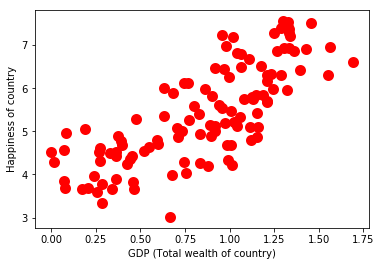

This shows that people in wealthy countries are more happier


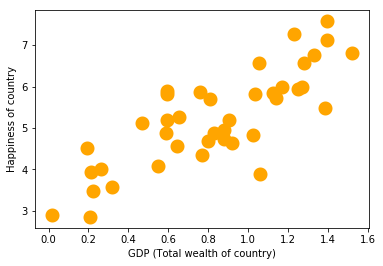

In [37]:
# print(help(plt.scatter))
plt.scatter(xtrain[:,-7],ytrain,color="red",linewidths =5)
# plt.scatter(xtrain[:,-4],alg.predict(xtrain),color="blue",linewidths =2)
plt.xlabel("GDP (Total wealth of country)")
plt.ylabel("Happiness of country")
plt.show()
print("This shows that people in wealthy countries are more happier")
plt.scatter(xtest[:,-7],ytest,color="orange",linewidths =8)
# plt.scatter(xtest[:,-4],ypred,color="green",linewidths =4)
plt.xlabel("GDP (Total wealth of country)")
plt.ylabel("Happiness of country")
plt.show()

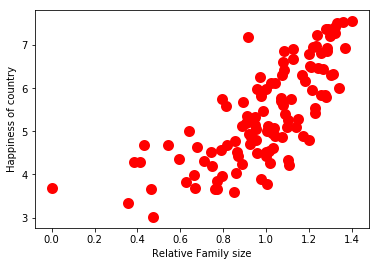

This shows that people in wealthy countries are more happier


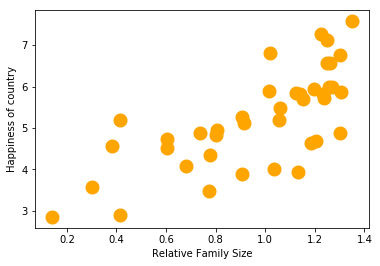

In [39]:
# print(help(plt.scatter))
plt.scatter(xtrain[:,-6],ytrain,color="red",linewidths =5)
# plt.scatter(xtrain[:,-4],alg.predict(xtrain),color="blue",linewidths =2)
plt.xlabel("Relative Family size")
plt.ylabel("Happiness of country")
plt.show()
print("This shows that people in wealthy countries are more happier")
plt.scatter(xtest[:,-6],ytest,color="orange",linewidths =8)
# plt.scatter(xtest[:,-4],ypred,color="green",linewidths =4)
plt.xlabel("Relative Family Size")
plt.ylabel("Happiness of country")
plt.show()